In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('C:/sports project/model/test_images/Maria_Sharapova_women-169589.jpg')
img.shape

(1000, 1600, 3)

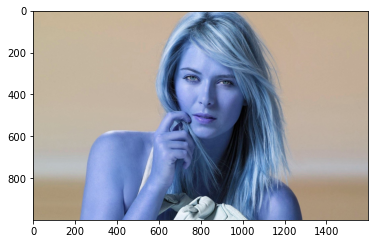

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1000, 1600)

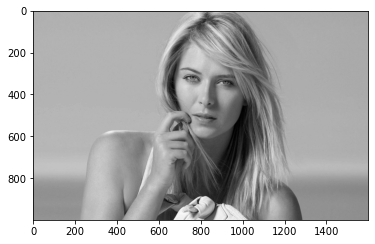

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
#detecting the face. It will give how many faces are detected

face_cascade = cv2.CascadeClassifier('C:/sports project/model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/sports project/model/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[628, 178, 414, 414]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(628, 178, 414, 414)

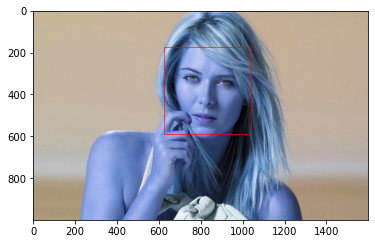

In [8]:
# draw a rectangle around the face using openCV

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

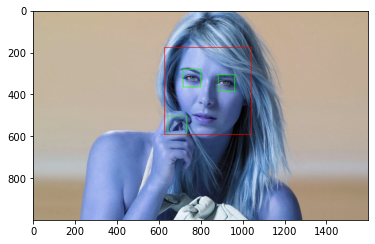

In [9]:
#iterating through all faces

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

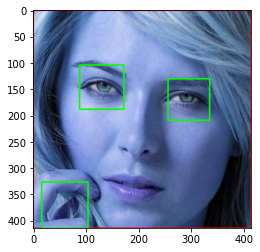

In [10]:
#to get cropped face. Plot the roi_color (roi -> region of interest)

%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)                                        # read the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)          # convert into gray
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)     # detect tha faces
    for (x,y,w,h) in faces:                                                    # go through all the faces using for loop
        roi_gray = gray[y:y+h, x:x+w]
        roi_color =  img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

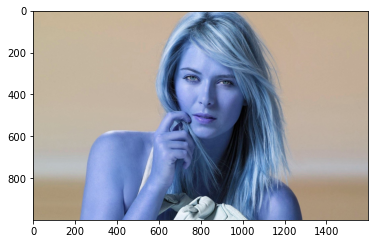

In [12]:
original_image = cv2.imread('C:/sports project/model/test_images/Maria_Sharapova_women-169589.jpg')
plt.imshow(original_image)

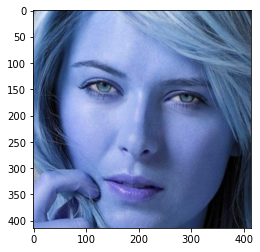

In [13]:
cropped_image = get_cropped_image_if_2_eyes('C:/sports project/model/test_images/Maria_Sharapova_women-169589.jpg')
plt.imshow(cropped_image)

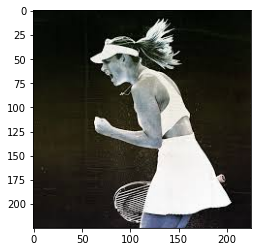

In [14]:
obstructed_org_image = cv2.imread('C:/sports project/model/test_images/images (1).jfif')
plt.imshow(obstructed_org_image)

In [15]:
# no image because the person has no two eyes)

cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/sports project/model/test_images/images (1).jfif')
cropped_image_no_2_eyes

In [16]:
path_to_data = "C:/sports project/model/dataset/"
path_to_cr_data = "C:/sports project/model/dataset/cropped/"      # to initialize stroring of cropped images in one folder

In [17]:
# to store the path of individual sub folders in python list`

import os
img_dirs = []                                          # the names of all folders in dataset folder are stored in img_dirs by making use of for loop
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs          

['C:/sports project/model/dataset/christiano ronaldo',
 'C:/sports project/model/dataset/dhoni',
 'C:/sports project/model/dataset/lionel messi',
 'C:/sports project/model/dataset/maria sharapova',
 'C:/sports project/model/dataset/neymar',
 'C:/sports project/model/dataset/roger federer',
 'C:/sports project/model/dataset/serena williams',
 'C:/sports project/model/dataset/virat kohli']

In [19]:
# if cropped folder is not present the below code will creat one

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
# iterate to each of these image directories

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]     #splitting the names in img_dirs and taking the last element which is the name of the celebrity
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []   # this empty list stires all the paths inside dictionary as a value
    
    #going through each of the images to get the cropped image
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)   # it returns cropped image when the image has 2 eyes else it returns none
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder: ",cropped_folder)
                
            # generating the name of the file    
            cropped_file_name = celebrity_name + str(count) + ".png"    # give file name as ex: lionel_messi
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            
            # storing the names of all those image paths into a dictionary which will be useful later
            # key: value  (key -> the name of the celebrity, value -> list of file paths of all images of lionel messi)
            

christiano ronaldo
generating cropped images in folder:  C:/sports project/model/dataset/cropped/christiano ronaldo
dhoni
generating cropped images in folder:  C:/sports project/model/dataset/cropped/dhoni
lionel messi
generating cropped images in folder:  C:/sports project/model/dataset/cropped/lionel messi
maria sharapova
generating cropped images in folder:  C:/sports project/model/dataset/cropped/maria sharapova
neymar
generating cropped images in folder:  C:/sports project/model/dataset/cropped/neymar
roger federer
generating cropped images in folder:  C:/sports project/model/dataset/cropped/roger federer
serena williams
generating cropped images in folder:  C:/sports project/model/dataset/cropped/serena williams
virat kohli
generating cropped images in folder:  C:/sports project/model/dataset/cropped/virat kohli


In [21]:
# hence many images are cropped due to complete cleaning process the below code is used to restore them

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'christiano ronaldo': ['C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo1.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo2.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo3.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo4.png'],
 'dhoni': ['C:/sports project/model/dataset/cropped/dhoni\\dhoni1.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni10.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni2.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni3.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni4.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni5.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni6.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni7.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni8.png',
  'C:/sports project/model/dataset/cropped/d

In [22]:
# Now the feature engineering is done
# feature engineering (wavelet transformation) is the technique called wave electrons form that can be used to extract the facial features like eyes, nose, lips etc

import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #DataType conersions
    #convert to gray scale
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #comput coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    #process coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

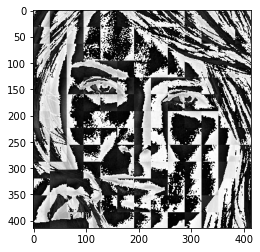

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

# the wavelet transform image is obtained

In [24]:
celebrity_file_names_dict

{'christiano ronaldo': ['C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo1.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo2.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo3.png',
  'C:/sports project/model/dataset/cropped/christiano ronaldo\\christiano ronaldo4.png'],
 'dhoni': ['C:/sports project/model/dataset/cropped/dhoni\\dhoni1.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni10.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni2.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni3.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni4.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni5.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni6.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni7.png',
  'C:/sports project/model/dataset/cropped/dhoni\\dhoni8.png',
  'C:/sports project/model/dataset/cropped/d

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'christiano ronaldo': 0,
 'dhoni': 1,
 'lionel messi': 2,
 'maria sharapova': 3,
 'neymar': 4,
 'roger federer': 5,
 'serena williams': 6,
 'virat kohli': 7}

In [26]:
# iterate through the dictionary
x = []
y = []

# the first for loop itetrate through every person
for celebrity_name, training_files in celebrity_file_names_dict.items():    
    # the second for loop iterate through all their images
    for training_image in training_files:           # training files are the values in a dictionary []
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32,32))     # scaling the original image 32x32
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32,32))   # scaling wavelet transform image
        # the dimensions of original img is 32*32*3,  *3 becoz it is a color image which has RGB colors
        # the dimensions of wavelet transform image is 32 * 32, it is a black n white doesnot have any RGB colors
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))  # vertically stacking the images
        x.append(combined_img)
        y.append(celebrity_name)

In [27]:
len(x)

190

In [28]:
32 * 32 * 3 + 32 * 32

4096

In [29]:
len(x[0])

4096

In [30]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

# the reshaping is done to make sure that num of images are 13 and the size of each image is 4096

(190, 4096)

In [31]:
# the data cleaning process is done and the training of model starts

In [32]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# first scaling the x train using standard scaler and then creating an SVM model
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7916666666666666

In [34]:
print(classification_report(y_test, pipe.predict(x_test)))

                 precision    recall  f1-score   support

          dhoni       1.00      0.50      0.67         4
   lionel messi       0.83      0.62      0.71         8
maria sharapova       0.82      1.00      0.90         9
         neymar       0.00      0.00      0.00         2
  roger federer       0.86      0.75      0.80         8
serena williams       0.86      0.86      0.86         7
    virat kohli       0.67      1.00      0.80        10

       accuracy                           0.79        48
      macro avg       0.72      0.68      0.68        48
   weighted avg       0.78      0.79      0.77        48



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# Let us now use GridSearch to try out different models with different parameters

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
# trying svm, random forest, logistic regression models to train and test the model and decide which one is more accurate

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
# Running GridSearchCV using the below code

scores = []
best_estimators = {}
import pandas as pd

# iterate the dictionary model_params
for algo, mp in model_params.items():
    # scaling the data
    pipe = make_pipeline(StandardScaler(), mp['model'])
    # Using the model to train the data
    # cv = 5 means if we have 100 samples means 1 to 80 will be used for training and remaining 20 will be used for testing
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.774631,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.598276,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.780788,{'logisticregression__C': 5}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(x_test,y_test)

0.8125

In [41]:
best_estimators['random_forest'].score(x_test,y_test)

0.6875

In [42]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8541666666666666

In [43]:
best_clf = best_estimators['logistic_regression']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 3,  0,  0,  0,  0,  0,  1],
       [ 0,  5,  1,  0,  0,  1,  1],
       [ 0,  0,  9,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  1,  0],
       [ 0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

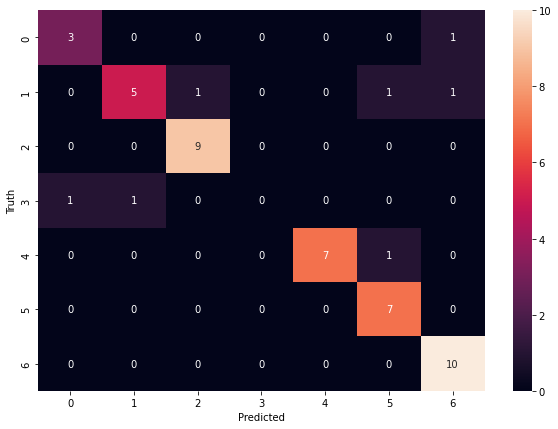

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
class_dict

{'christiano ronaldo': 0,
 'dhoni': 1,
 'lionel messi': 2,
 'maria sharapova': 3,
 'neymar': 4,
 'roger federer': 5,
 'serena williams': 6,
 'virat kohli': 7}